In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

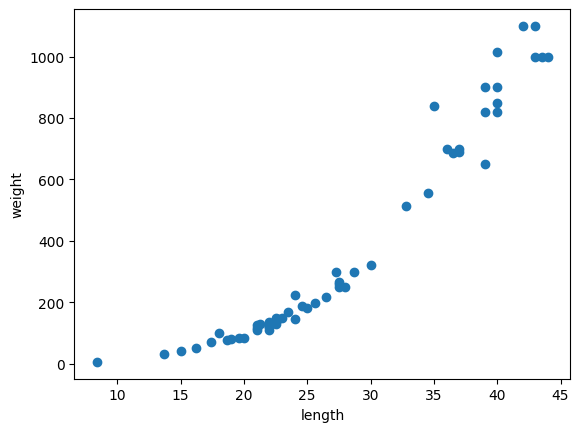

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

knr.predict([[50]])

array([1033.33333333])

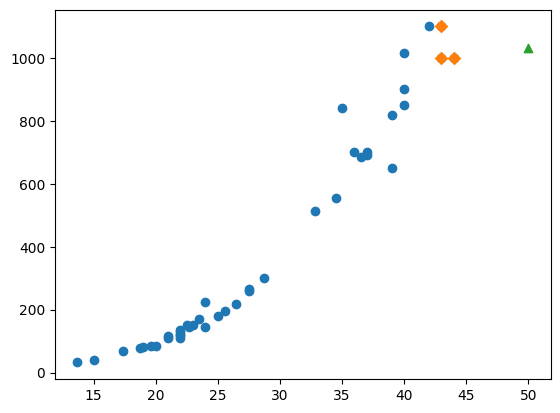

In [26]:
# 길이 50 농어의 이웃정보
distances, indexes = knr.kneighbors([[50]])

# 학습 데이터 전체 표시
plt.scatter(train_input, train_target)

# 길이가 50인 농어의 가장 가까운 이웃 3개 표시 (다이아)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 길이 50, 무게 1033 인 농어를 수동 표시
plt.scatter(50, 1033, marker='^')

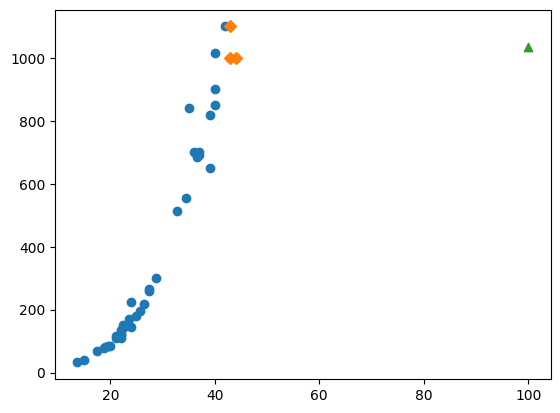

In [28]:
big_fish = 100

distances, indexes = knr.kneighbors([[big_fish]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(big_fish, knr.predict([[big_fish]]), marker='^')

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

In [41]:
lr.coef_, lr.intercept_

(array([39.01714496]), np.float64(-709.0186449535474))

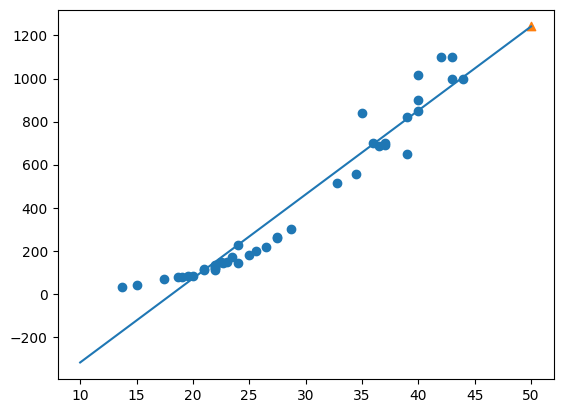

In [51]:
# 훈련 데이터 점찍기
plt.scatter(train_input, train_target)

# lr 예측기의 함수 그래프
plt.plot([10, 50], [10*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 길이 50의 예측값 표시
plt.scatter(50, lr.predict([[50]]), marker='^')

In [47]:
# 학습데이터 <=> 모델(함수) 간의 점수 (오차)
lr.score(train_input, train_target)

0.9398463339976041

In [49]:
# 테스트 데이터 <=> 모델(함수) 간의 점수 (오차)
lr.score(test_input, test_target)

0.824750312331356

In [57]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [60]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), np.float64(116.05021078278264))

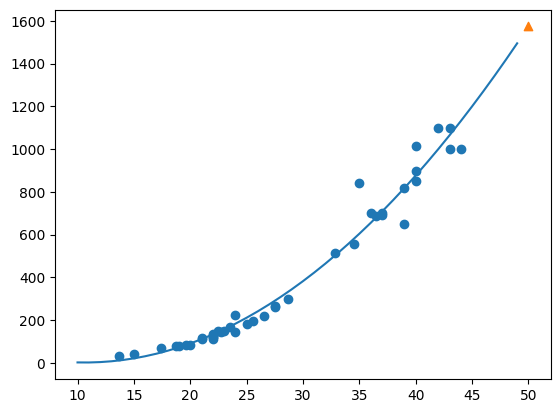

In [67]:
plt.scatter(train_input, train_target)
point = np.arange(10, 50)
plt.plot(point, 1.01433211 * point**2 - 21.55792498 * point + 116.05021078278264)
plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')

In [68]:
lr.score(train_poly, train_target)

0.9706807451768623

In [69]:
)

0.9775935108325122